<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedFeatureEngineering/blob/Encoding/TargetProbabilityEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/content/drive/MyDrive/Udemy Courses - 2.0/Feature Engineering/Dataset/titanic.csv'
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
use_cols=['Sex', 'Embarked', 'Cabin', 'Survived']

In [5]:
data = data[use_cols]

In [6]:
data['Cabin'] = data['Cabin'].str[0]

In [7]:
data.isnull().sum()

Sex           0
Embarked      2
Cabin       687
Survived      0
dtype: int64

In [8]:
for col in data.columns:
  data[col].fillna(data[col].mode()[0], inplace = True)

In [9]:
data.isnull().sum()

Sex         0
Embarked    0
Cabin       0
Survived    0
dtype: int64

In [10]:
X = data.drop('Survived', axis =1)
y = data['Survived']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

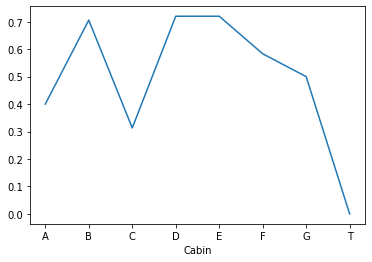

In [13]:
pd.concat([X_train,y_train], axis = 1).groupby('Cabin')['Survived'].mean().plot()
plt.show()

In [14]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 8.5 MB/s 


In [18]:
from feature_engine.encoding import PRatioEncoder

In [19]:
prob_enc = PRatioEncoder()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:67: FutureWarning: Class PRatioEncoder is deprecated; PRatioEncoder() is deprecated in version 1.5 and will be removed in version 1.6. Use WoEEncoder() instead for a similar approach.
  warnings.warn(msg, category=FutureWarning)


In [21]:
prob_enc.fit(X_train,y_train)

PRatioEncoder()

In [22]:
prob_enc.encoder_dict_

{'Sex': {'female': 2.7288135593220337, 'male': 0.2175226586102719},
 'Embarked': {'C': 1.2599999999999998,
  'Q': 0.5294117647058824,
  'S': 0.49673202614379086},
 'Cabin': {'A': 0.6666666666666667,
  'B': 2.4000000000000004,
  'C': 0.45609065155807366,
  'D': 2.571428571428571,
  'E': 2.571428571428571,
  'F': 1.4000000000000001,
  'G': 1.0,
  'T': 0.0}}

In [23]:
prob_enc.transform(X_train)

,Sex,Embarked,Cabin
69,0.217523,0.496732,0.456091
85,2.728814,0.496732,0.456091
794,0.217523,0.496732,0.456091
161,2.728814,0.496732,0.456091
815,0.217523,0.496732,2.400000
...,...,...,...
855,2.728814,0.496732,0.456091
871,2.728814,0.496732,2.571429
835,2.728814,1.260000,2.571429
792,2.728814,0.496732,0.456091


In [24]:
X_train = prob_enc.transform(X_train)
X_test = prob_enc.transform(X_test)

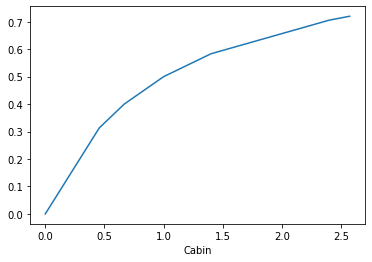

In [25]:
pd.concat([X_train,y_train], axis = 1).groupby('Cabin')['Survived'].mean().plot()
plt.show()